# Forecasting Unemployment Rate  in Canada Using ARIMA


### Import Libraries and Read File

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data =pd.read_csv('Clean_Dataset.csv', index_col='Date', parse_dates=True)
data.head()

,Month,Labour Force,Employment,Unemployment,Beneficiaries,Unemployment_Rate
Date,,,,,,
1997-01-01,January,14677800,13162900,1514500,689660,0.103250
1997-02-01,February,14743400,13230600,1512600,678560,0.102208
1997-03-01,March,14780700,13304800,1476100,667350,0.102304
1997-04-01,April,14828500,13371100,1457700,662150,0.102792
1997-05-01,May,15185900,13748300,1437700,666020,0.095392


In [4]:
data.index.freq = 'MS'
print(data.head())

               Month  Labour Force  Employment  Unemployment  Beneficiaries  \
Date                                                                          
1997-01-01   January      14677800    13162900       1514500         689660   
1997-02-01  February      14743400    13230600       1512600         678560   
1997-03-01     March      14780700    13304800       1476100         667350   
1997-04-01     April      14828500    13371100       1457700         662150   
1997-05-01       May      15185900    13748300       1437700         666020   

            Unemployment_Rate  
Date                           
1997-01-01           0.103250  
1997-02-01           0.102208  
1997-03-01           0.102304  
1997-04-01           0.102792  
1997-05-01           0.095392  


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 300 entries, 1997-01-01 to 2021-12-01
Freq: MS
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              300 non-null    object 
 1   Labour Force       300 non-null    int64  
 2   Employment         300 non-null    int64  
 3   Unemployment       300 non-null    int64  
 4   Beneficiaries      300 non-null    int64  
 5   Unemployment_Rate  300 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 16.4+ KB


In [6]:
data.columns

Index(['Month', 'Labour Force', 'Employment', 'Unemployment', 'Beneficiaries',
       'Unemployment_Rate'],
      dtype='object')

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Labour Force,300.0,1.801526e+07,1.586419e+06,1.467780e+07,1.685815e+07,1.826545e+07,1.926750e+07,2.089040e+07
Employment,300.0,1.671282e+07,1.536781e+06,1.316290e+07,1.557738e+07,1.690465e+07,1.789235e+07,1.940140e+07
Unemployment,300.0,1.302434e+06,2.276459e+05,9.541000e+05,1.156950e+06,1.268250e+06,1.406125e+06,2.672300e+06
Beneficiaries,300.0,5.960918e+05,2.013139e+05,2.137500e+05,5.153725e+05,5.496200e+05,5.939350e+05,1.678060e+06
Unemployment_Rate,300.0,8.172857e-02,1.021026e-02,6.066923e-02,7.442692e-02,8.079038e-02,8.787115e-02,1.312192e-01




### Missing Values 

In [8]:
data.isnull().sum()

Month                0
Labour Force         0
Employment           0
Unemployment         0
Beneficiaries        0
Unemployment_Rate    0
dtype: int64

### Exploratory Data Analysis (Visualisation)

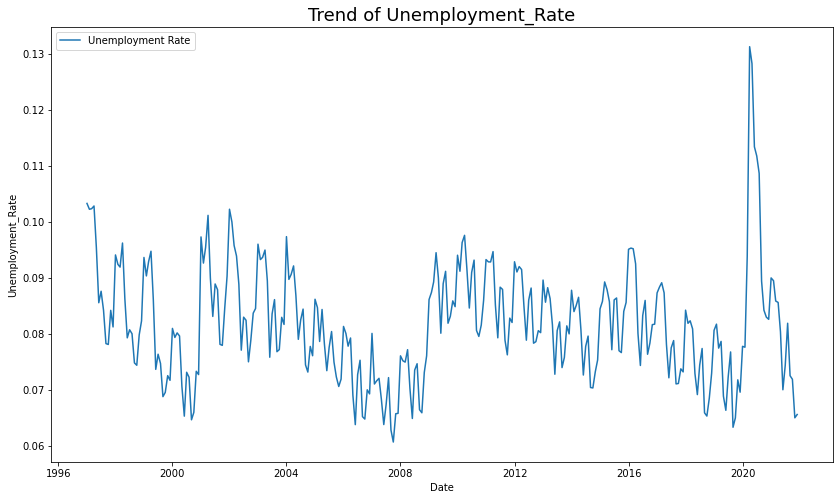

In [9]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='Date',y='Unemployment_Rate')
plt.title('Trend of Unemployment_Rate', fontsize=18)
plt.ylabel('Unemployment_Rate')
plt.legend(labels=['Unemployment Rate'])

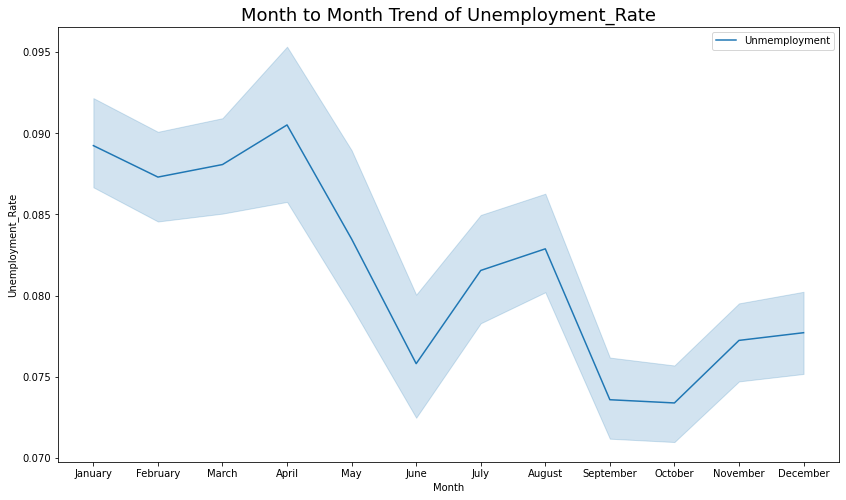

In [10]:
plt.figure(figsize=(14,8))
sns.lineplot(data=data, x='Month',y='Unemployment_Rate')
plt.title('Month to Month Trend of Unemployment_Rate', fontsize=18)
plt.ylabel('Unemployment_Rate')
plt.legend(labels=['Unmemployment'])

<AxesSubplot:title={'center':'Yearly Trend of Unemployment and EI Beneficiaries'}, xlabel='Date', ylabel='Unemployment'>

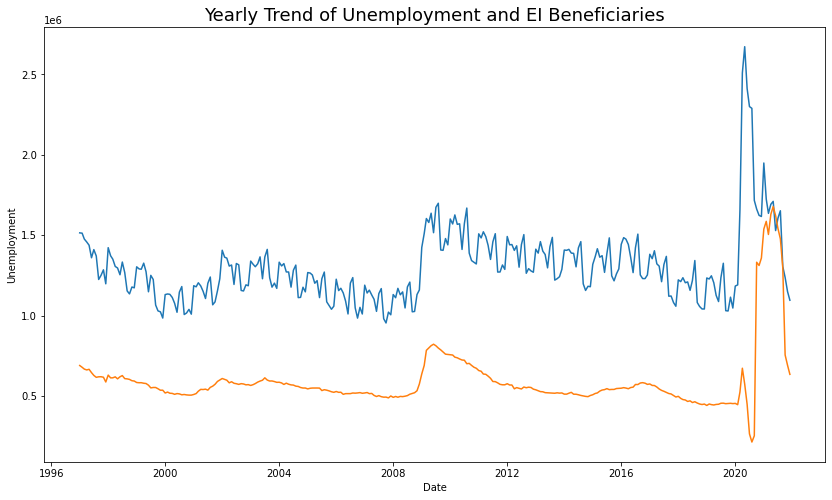

In [11]:
plt.figure(figsize=(14,8))
plt.title('Yearly Trend of Unemployment and EI Beneficiaries', fontsize=18)
sns.lineplot(data=data, x='Date',y='Unemployment')
sns.lineplot(data=data, x='Date',y='Beneficiaries')

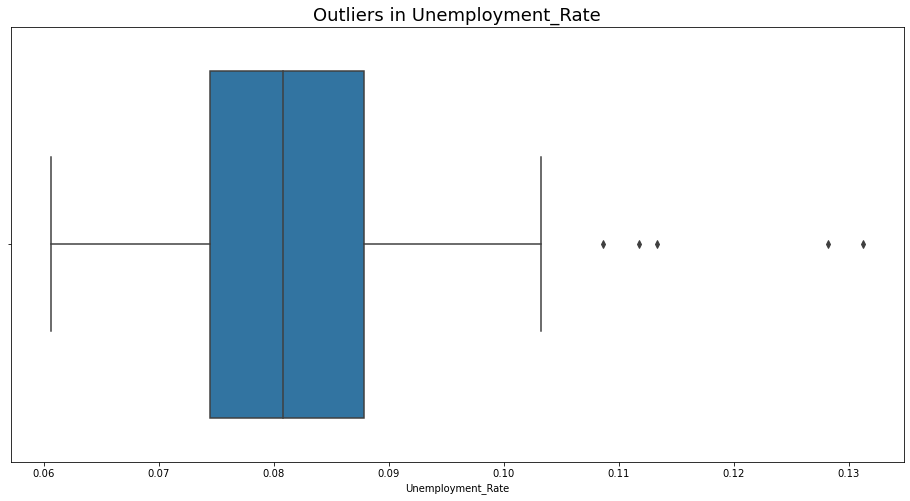

In [12]:
fig = plt.subplots(figsize=(16, 8))
plt.title('Outliers in Unemployment_Rate', fontsize=18)
ax = sns.boxplot(x=data['Unemployment_Rate'],whis=1.5)

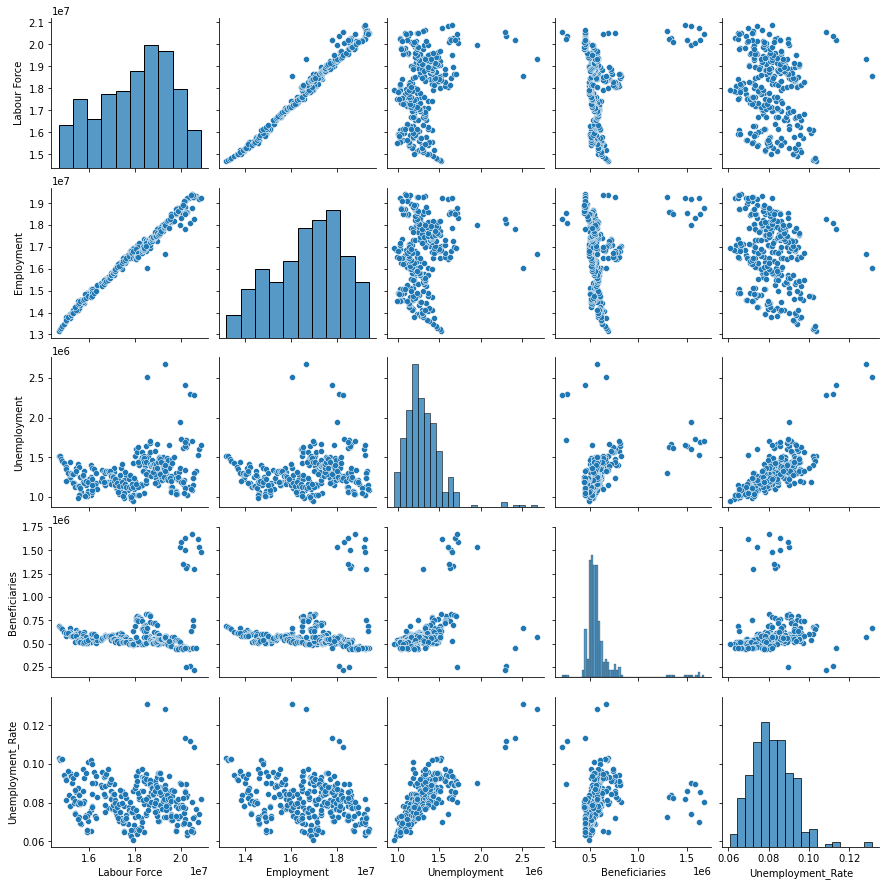

In [13]:
sns.pairplot(data)

In [14]:
data.tail()

,Month,Labour Force,Employment,Unemployment,Beneficiaries,Unemployment_Rate
Date,,,,,,
2021-08-01,August,20890400,19238400,1652000,1477380,0.081865
2021-09-01,September,20578700,19273300,1305300,1296680,0.072504
2021-10-01,October,20520800,19283800,1237100,755140,0.071865
2021-11-01,November,20528300,19379000,1149300,691060,0.064992
2021-12-01,December,20463400,19367700,1095500,634610,0.065581


In [15]:
data.shape

(300, 6)

### Run ETS Decomposition

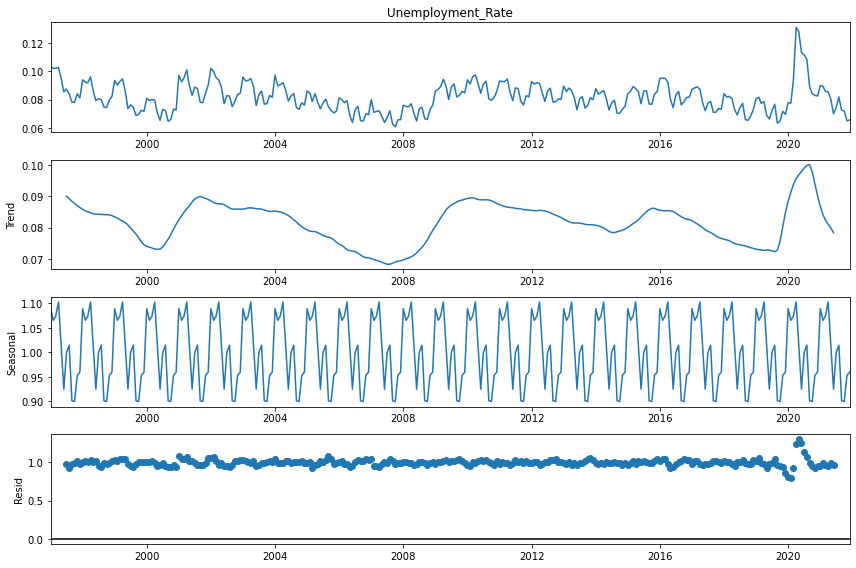

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = (12, 8)
result = seasonal_decompose(data['Unemployment_Rate'], model='mul')  
result.plot();

### Checking  for Stationarity

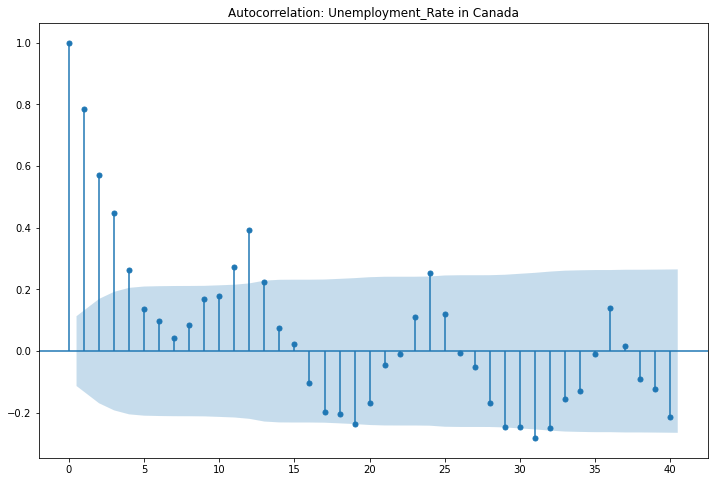

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
title = 'Autocorrelation: Unemployment_Rate in Canada'
lags = 40
plot_acf(data['Unemployment_Rate'],title=title,lags=lags);

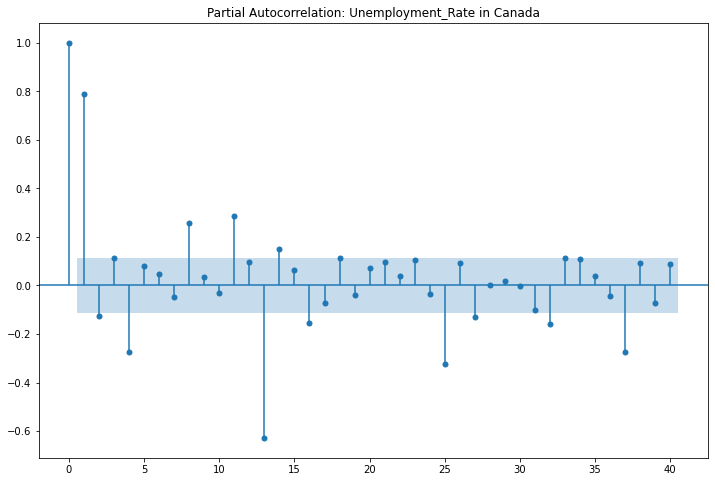

In [20]:
title = 'Partial Autocorrelation: Unemployment_Rate in Canada'
lags = 40
plot_pacf(data['Unemployment_Rate'],title=title,lags=lags);

In [21]:
from statsmodels.tsa.stattools import adfuller
print('p-value:', adfuller(data['Unemployment_Rate'])[1])
if adfuller(data['Unemployment_Rate'])[1] <= 0.05:
        print("Data has no unit root and is stationary")
else:
        print("Data has a unit root and is non-stationary")

p-value: 0.00047961522745986623
Data has no unit root and is stationary


### Use pmdarima.auto_arima to determine ARIMA Orders

In [22]:
from pmdarima import auto_arima
auto_arima(data['Unemployment_Rate'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 0, 4)   Log Likelihood                1114.838
Date:                Thu, 21 Apr 2022   AIC                          -2217.676
Time:                        01:39:39   BIC                          -2195.454
Sample:                             0   HQIC                         -2208.783
                                - 300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0818      0.001     61.434      0.000       0.079       0.084
ma.L1          0.9417      0.049     19.403      0.000       0.847       1.037
ma.L2          0.5915      0.070      8.416      0.000       0.454       0.729
ma.L3          0.6411      0.083      7.709      0.000       0.478       0.804
ma.L4          0.3839      0.066      5.812      0.000       0.254       0.513
sigma2      3.443e-05   2.03e-06     16.940      0.000    3.05e-05    3.84e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):               282.76
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                             0.97
Prob(H) (two-sided):                  0.28   Kurtosis:                         7.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Split Data into Training and Test Sets

In [23]:
len(data)

300

In [24]:
train = data.iloc[: len(data)-12]
test = data.iloc[len(data)-12:]

### Apply ARIMA Model

In [25]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
model = ARIMA(train['Unemployment_Rate'],order=(0,0,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Unemployment_Rate   No. Observations:                  288
Model:                     ARMA(0, 4)   Log Likelihood                1070.552
Method:                       css-mle   S.D. of innovations              0.006
Date:                Thu, 21 Apr 2022   AIC                          -2129.105
Time:                        01:39:39   BIC                          -2107.127
Sample:                    01-01-1997   HQIC                         -2120.297
                         - 12-01-2020                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0820      0.001     66.729      0.000       0.080       0.084
ma.L1.Unemployment_Rate     0.9397      0.052     17.942      0.000       0.837       1.042
ma.L2.Unemployment_Rate     0.5921      0.068      8.658      0.000       0.458       0.726
ma.L3.Unemployment_Rate     0.6473      0.088      7.337      0.000       0.474       0.820
ma.L4.Unemployment_Rate     0.3959      0.057      6.987      0.000       0.285       0.507
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.3585           -1.1783j            1.2316           -0.2030
MA.2            0.3585           +1.1783j            1.2316            0.2030
MA.3           -1.1760           -0.5314j            1.2904           -0.4325
MA.4           -1.1760           +0.5314j            1.2904            0.4325
-----------------------------------------------------------------------------
"""

### Predict on Test Set 

In [26]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Test Set Predictions')

In [27]:
#compare to actuals
for i in range(len(predictions)):
    print(f"Actual={test['Unemployment_Rate'][i]},Predicted={predictions[i]:<11.10}")

Actual=0.089953846,Predicted=0.08033135481
Actual=0.089457692,Predicted=0.0805646484
Actual=0.085830769,Predicted=0.08171384906
Actual=0.085580769,Predicted=0.08283401643
Actual=0.080334615,Predicted=0.08198421325
Actual=0.069996154,Predicted=0.08198421325
Actual=0.074338462,Predicted=0.08198421325
Actual=0.081865385,Predicted=0.08198421325
Actual=0.072503846,Predicted=0.08198421325
Actual=0.071865385,Predicted=0.08198421325
Actual=0.064992308,Predicted=0.08198421325
Actual=0.065580769,Predicted=0.08198421325


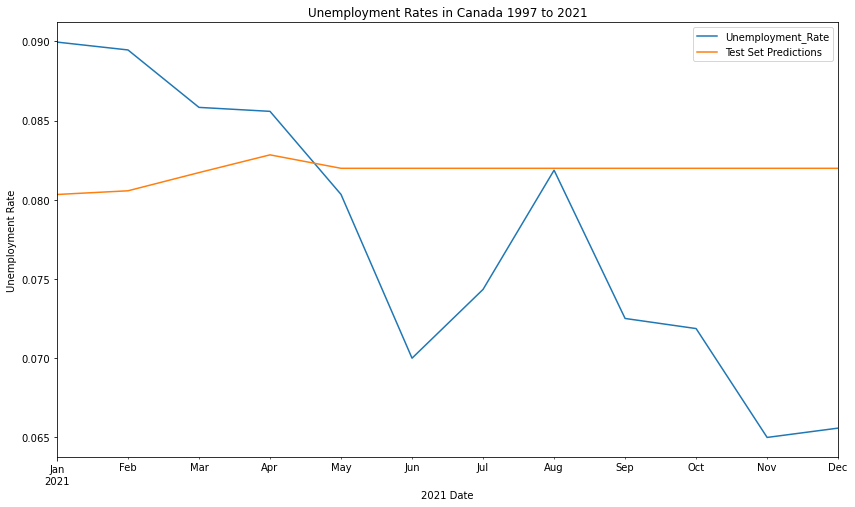

In [28]:
title = 'Unemployment Rates in Canada 1997 to 2021'
ylabel='Unemployment Rate'
xlabel='2021 Date' 

ax = test['Unemployment_Rate'].plot(legend=True,figsize=(14,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Evaluation Results

In [29]:
from statsmodels.tools.eval_measures import rmse, mse
print('MSE: ',mse(test['Unemployment_Rate'], predictions))
print('RMSE: ',rmse(test['Unemployment_Rate'], predictions))

MSE:  9.592870723400466e-05
RMSE:  0.009794320151700406


In [30]:
test['Unemployment_Rate'].mean()

0.07769166666666666

### Forecasting 2022

In [31]:
#Retrain on Entire Dataset
model = ARIMA(data['Unemployment_Rate'],order=(0,0,5))
results = model.fit()
forecast = results.predict(len(data),len(data)+11,typ='levels').rename('Forecast')
forecast

2022-01-01    0.069890
2022-02-01    0.072991
2022-03-01    0.077147
2022-04-01    0.081611
2022-05-01    0.081817
2022-06-01    0.081746
2022-07-01    0.081746
2022-08-01    0.081746
2022-09-01    0.081746
2022-10-01    0.081746
2022-11-01    0.081746
2022-12-01    0.081746
Freq: MS, Name: Forecast, dtype: float64

In [32]:
forecast

2022-01-01    0.069890
2022-02-01    0.072991
2022-03-01    0.077147
2022-04-01    0.081611
2022-05-01    0.081817
2022-06-01    0.081746
2022-07-01    0.081746
2022-08-01    0.081746
2022-09-01    0.081746
2022-10-01    0.081746
2022-11-01    0.081746
2022-12-01    0.081746
Freq: MS, Name: Forecast, dtype: float64

### Plot Forecasted Results

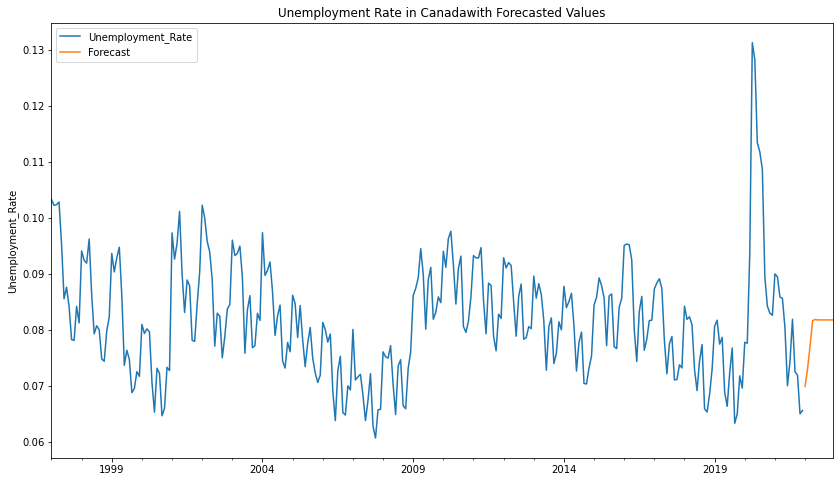

In [33]:
title = 'Unemployment Rate in Canadawith Forecasted Values'
ylabel='Unemployment_Rate'
xlabel='' # we don't really need a label here

ax = data['Unemployment_Rate'].plot(legend=True,figsize=(14,8),title=title)
forecast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);